In [3]:
import networkx as nx
import numpy as np
import EoN
%run -i "Functions.py"
import matplotlib.pyplot as plt

import matplotlib as mpl
# Axes
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
# ticks
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
# grid
mpl.rcParams['grid.color'] = 'gray'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.alpha'] = 0.5
mpl.rcParams['grid.linewidth'] = 0.5
# legend
mpl.rcParams['legend.fontsize'] = 14
# figure
mpl.rcParams['figure.figsize'] = (5,5)
mpl.rcParams['figure.autolayout'] = True
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm


In [5]:
net,number_of_nodes = Net_generation("network_rocha-etal.csv")



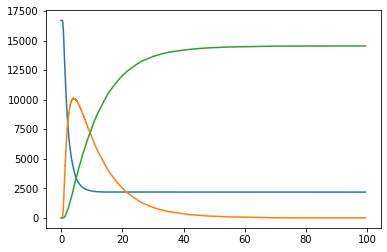

In [3]:
t, S,I,R = EoN.fast_SIR(net, 0.5 , 0.1, rho=0.0005,return_full_data=False)
plt.plot(t,S)
plt.plot(t,I)
plt.plot(t,R)

In [4]:
n = np.array([1, 3, 6, 9])
params = np.array([n*1e-04, n*1e-03, n*0.01, n*0.1]).flatten()
params=params.round(decimals=5)
params

array([1.e-04, 3.e-04, 6.e-04, 9.e-04, 1.e-03, 3.e-03, 6.e-03, 9.e-03,
       1.e-02, 3.e-02, 6.e-02, 9.e-02, 1.e-01, 3.e-01, 6.e-01, 9.e-01])

In [5]:
# Simulation
want_simulation=False
if want_simulation:
    # Defining parameter of the epidemic
    franction_of_initial_infected=0.005
    Sim_data=[]
    #start grid search
    for gamma in params:
        for tau in params:
            t, S,I,R = EoN.fast_SIR(net, tau, gamma, rho=franction_of_initial_infected,return_full_data=False)
            Sim_data.append([gamma,tau,t,S,I,R])
            print(gamma)



    # preparing data for exporting
    mu =np.array([row[0] for row in Sim_data]) #gamma
    beta = np.array([row[1] for row in Sim_data]) #tau
    time=[row[2] for row in Sim_data]
    S=[row[3] for row in Sim_data]
    I=[row[4] for row in Sim_data]
    R=[row[5] for row in Sim_data]

    # save offline
    np.savez_compressed("simulazione_SIR", mu=mu, beta=beta, time=time, S=S, I=I,R=R)


In [6]:
# load simulation file
Sim=np.load("simulazione_SIR.npz",allow_pickle=True)
mu =Sim["mu"]
beta = Sim["beta"]
Y=mu.ravel()
X=beta.ravel()
time=Sim["time"]
S=Sim["S"]
I=Sim["I"]
R=Sim["R"]

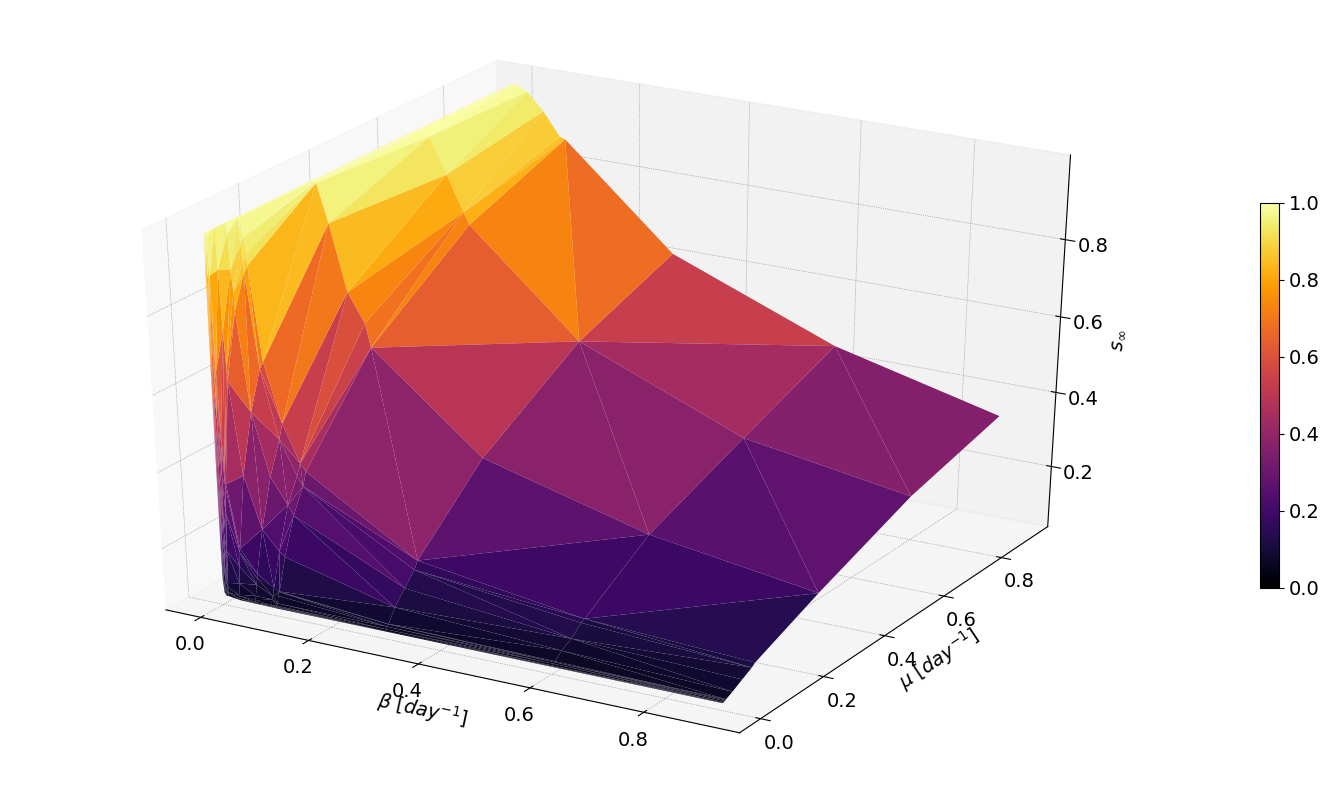

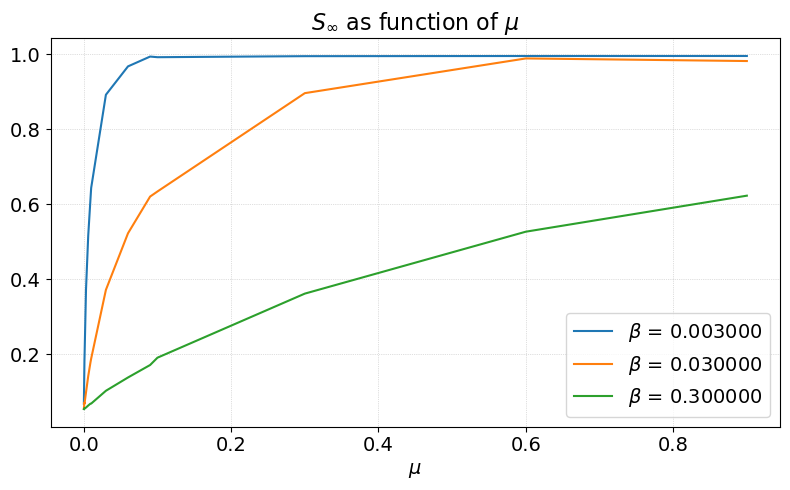

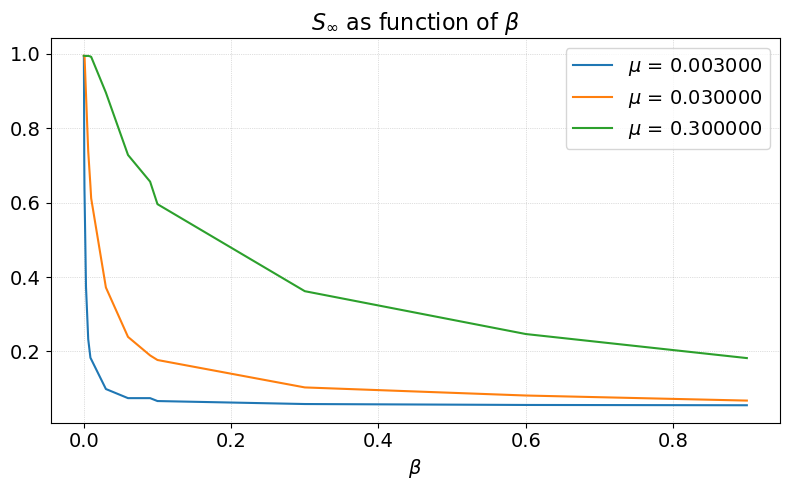

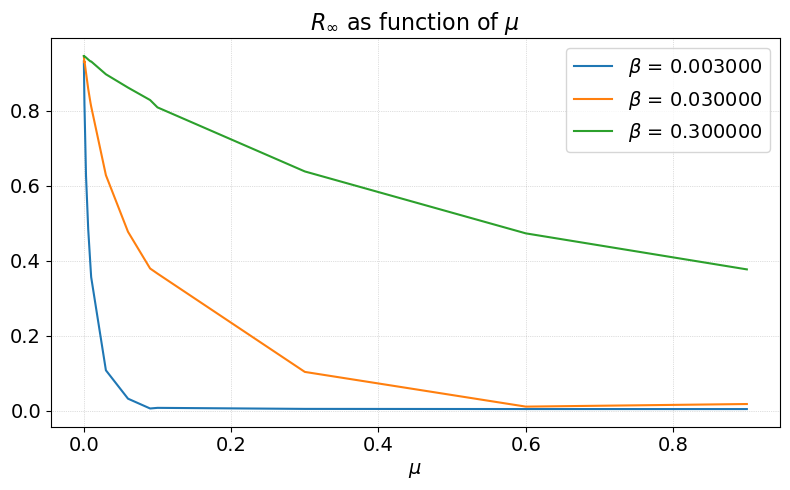

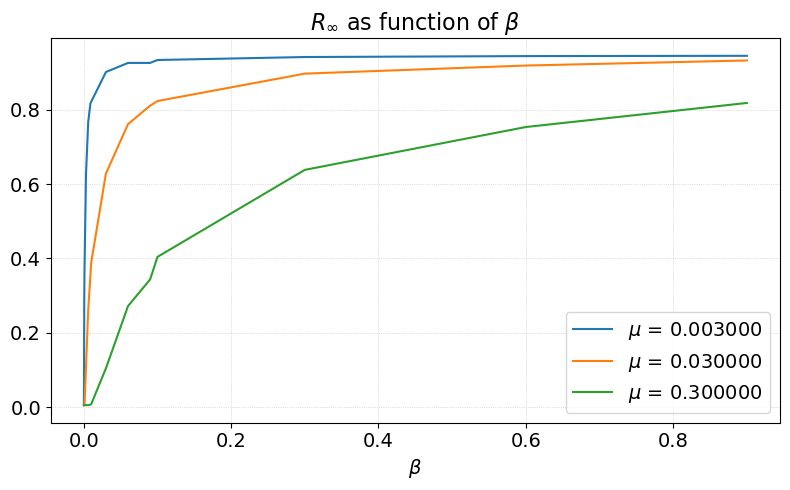

In [7]:
#%% Plot of S_inf and R_inf and some cut
S_inf, R_inf = S_R_inf_surfaces(mu,beta,time,S,I,R,number_of_nodes)

S_inf_mu_norm, S_inf_beta_norm =tagli(mu,beta,S_inf,number_of_nodes,[0.003,0.03,0.3],"$S_\\infty$","$S_\\infty$")
R_inf_mu_norm, R_inf_beta_norm =tagli(mu,beta,R_inf,number_of_nodes,[0.003,0.03,0.3],"$R_\\infty$","$S_\\infty$")

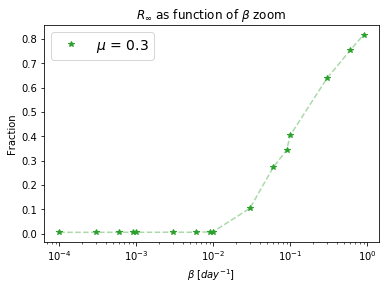

In [9]:
plt.plot(R_inf_beta_norm[2][0],R_inf_beta_norm[2][1],"*",color="C2",label="$\\mu$ = 0.3")
plt.plot(R_inf_beta_norm[2][0],R_inf_beta_norm[2][1],"--",color="C2",alpha=0.4)
plt.xscale("log")
plt.xlabel("$\\beta$ $[day^{-1}]$")
plt.ylabel("Fraction")
plt.legend(fontsize=14)
plt.title("$R_\\infty$ as function of $\\beta$ zoom")
plt.savefig("./Figure/Sim_static/SIR/zoom_Bcrit.pdf")
plt.show()

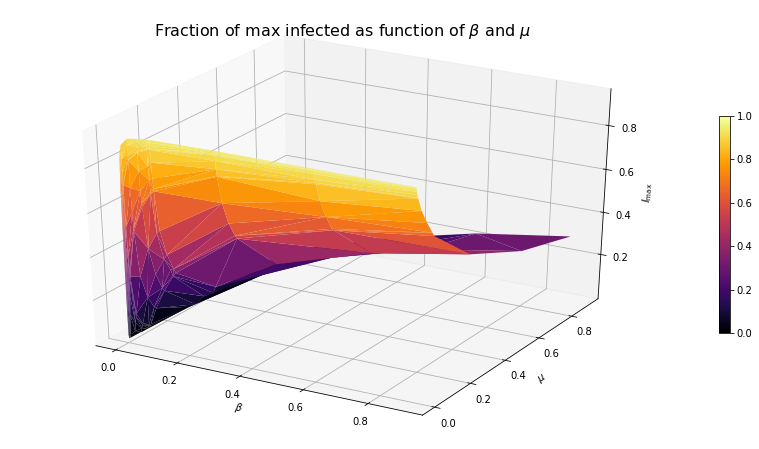

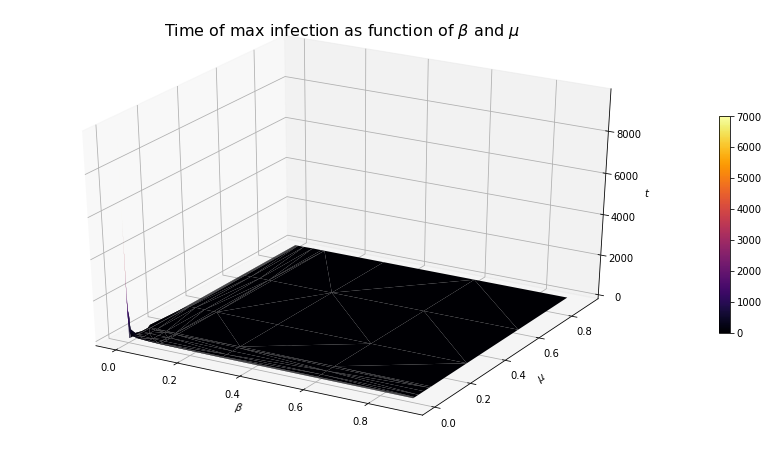

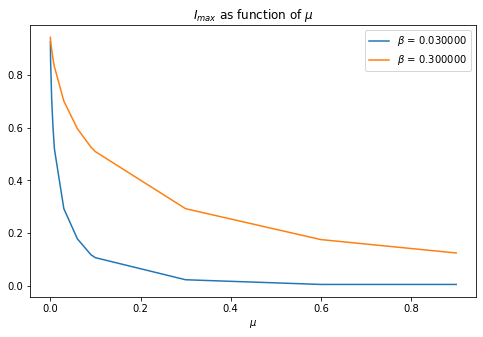

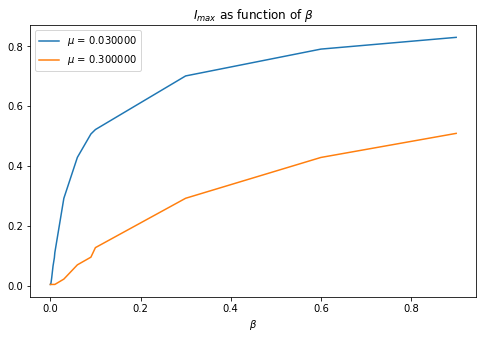

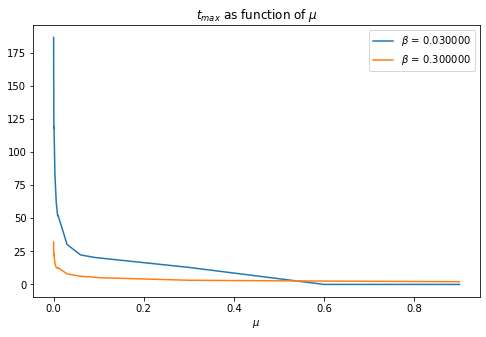

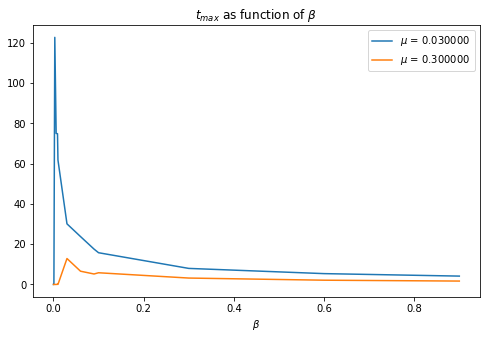

In [11]:
#%% Plot of I_max and time(I_max) and some cut
I_max,time_max = I_max_surfaces(mu,beta,time,S,I,R,number_of_nodes)

I_max_mu,I_max_beta=tagli(mu,beta,I_max,number_of_nodes,[0.03,0.3],"$I_{max}$","$I_{max}$")

t_max_mu,t_max_beta=tagli(mu,beta,time_max,1,[0.03,0.3],"$t_{max}$","$t_{max}$")

## Segregation

In [12]:
    #%% creation of the Net without nodes with greatest degree
    a=[]
    b=[]

    female, male, time = np.loadtxt("network_rocha-etal.csv", unpack=True, comments="#", dtype=np.int16)
    dim = max(female.max(), male.max())+1
    adj = np.zeros((dim,dim))
    for i,j in zip(female,male):
        adj[i,j] = 1
        adj[j,i] = 1
    net_target = nx.from_numpy_array(adj)

    id_female = np.unique(female)
    id_male   = np.unique(male)
    a_, deg = zip(*list(net_target.degree()))


In [13]:
    #%%simulation
    Sim_data=[]
    want_simulation=False
    if want_simulation:
        for i in (10,100,200):
            net_target_copy = net_target.copy()
            remove = [node for node,degree in dict(net_target.degree()).items() if degree >= i]
            net_target_copy.remove_nodes_from(remove)

            #SIMULATION
            # Defining parameter of the epidemic
            franction_of_initial_infected=0.005
            for gamma in params:
                for tau in params:
                    t,S,I,R = EoN.fast_SIR(net_target_copy, tau, gamma,rho=franction_of_initial_infected,return_full_data=False)
                    Sim_data.append([i,gamma,tau,t,S,I,R])
                    print(i,gamma)

        #%% preparing data for exporting
            last_deg_kept= np.array([row[0] for row in Sim_data])
            mu =np.array([row[1] for row in Sim_data]) #gamma
            beta = np.array([row[2] for row in Sim_data]) #tau
            time=[row[3] for row in Sim_data]
            S=[row[4] for row in Sim_data]
            I=[row[5] for row in Sim_data]
            R=[row[6] for row in Sim_data]

        # save offline
        np.savez_compressed("simulazione_target_SIR",last_deg_kept=last_deg_kept, mu=mu, beta=beta, time=time, S=S, I=I,R=R)

In [14]:
#%%load data
Sim_t=np.load("simulazione_target_SIR.npz",allow_pickle=True)
last_deg_kept= np.array(Sim_t["last_deg_kept"])
mu_t =np.array(Sim_t["mu"])
beta_t = np.array(Sim_t["beta"])
time_t=np.array(Sim_t["time"])
S_t=np.array(Sim_t["S"])
I_t=np.array(Sim_t["I"])
R_t=np.array(Sim_t["R"])

###########################################################################################################
Rimozione dopo il grado:  10
###########################################################################################################
###########################################################################################################
###########################################################################################################


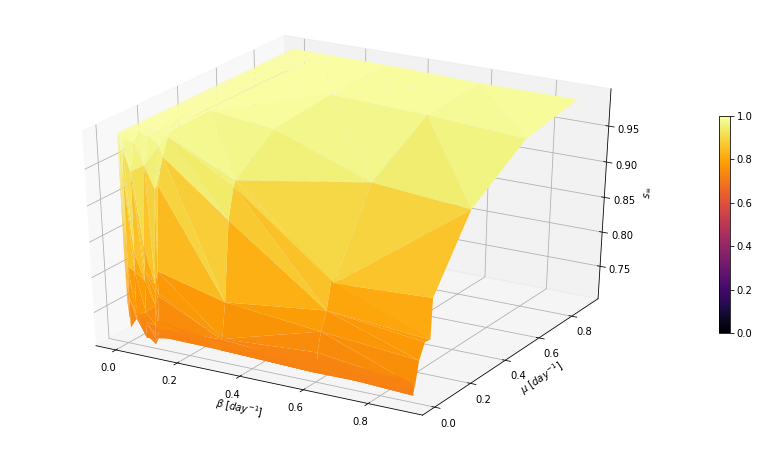

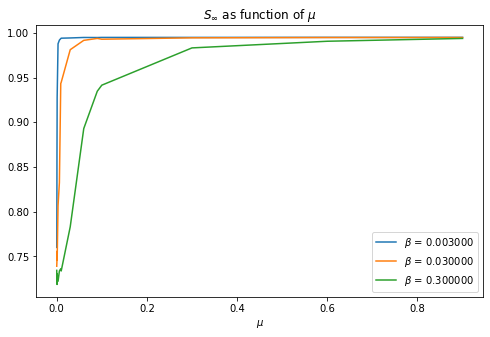

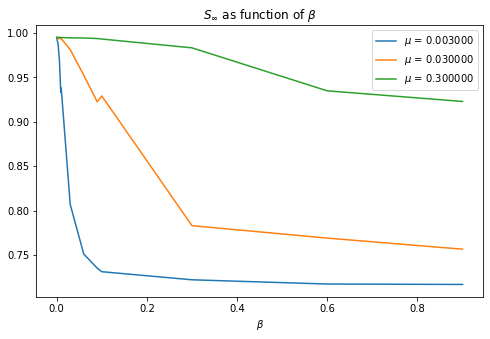

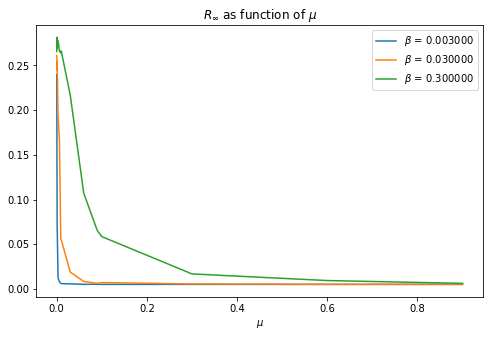

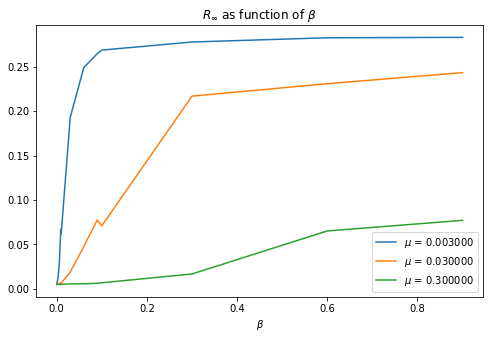

###########################################################################################################
Rimozione dopo il grado:  100
###########################################################################################################
###########################################################################################################
###########################################################################################################


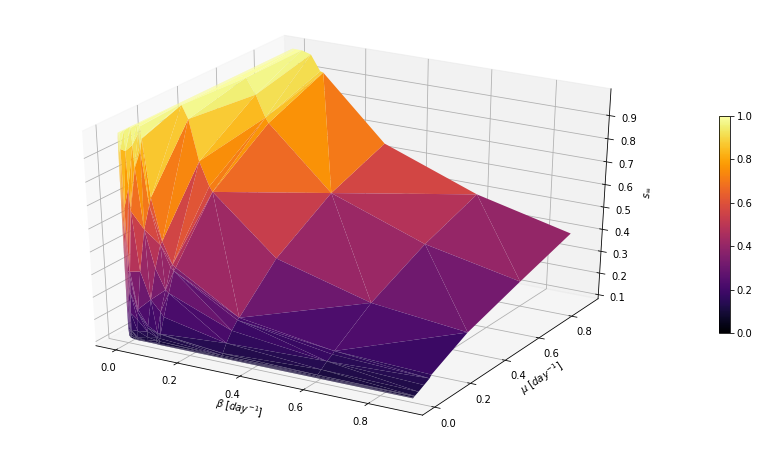

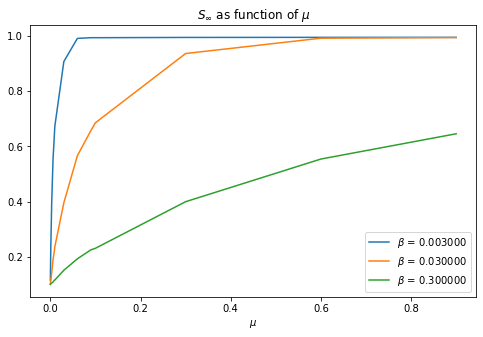

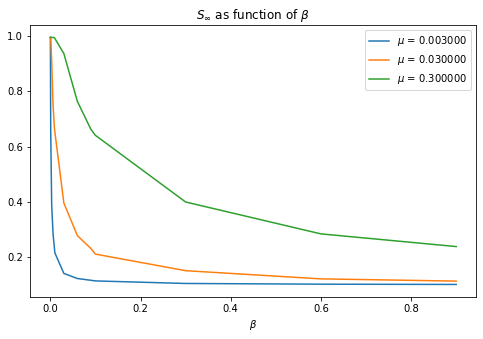

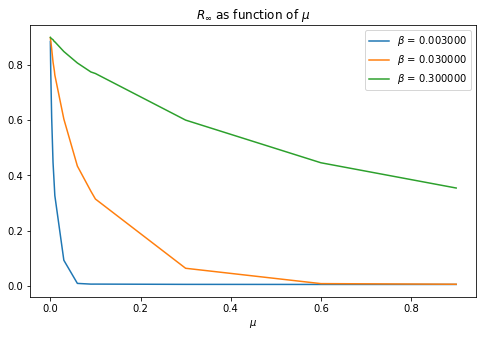

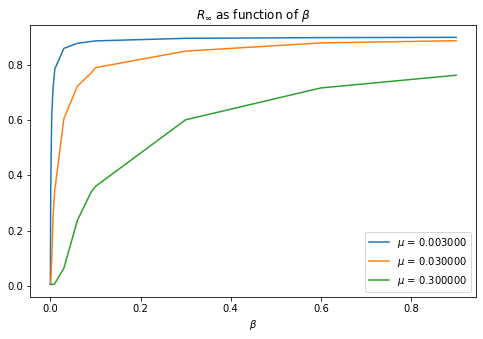

###########################################################################################################
Rimozione dopo il grado:  200
###########################################################################################################
###########################################################################################################
###########################################################################################################


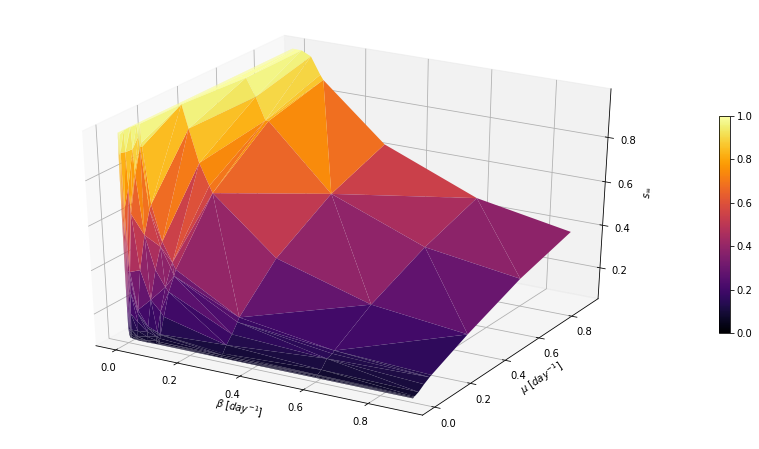

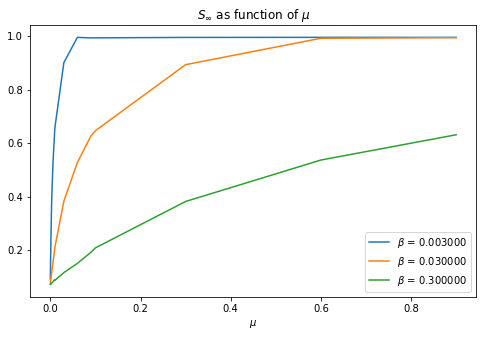

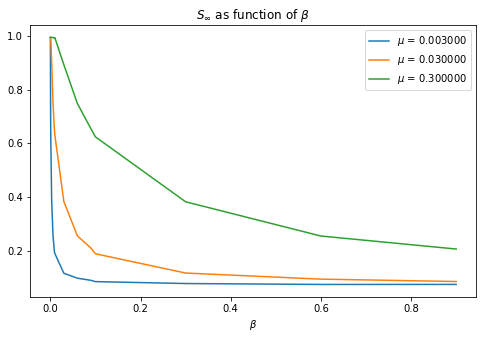

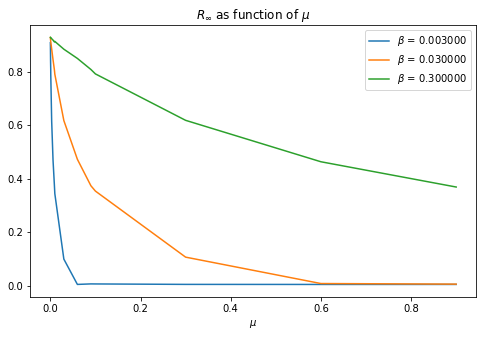

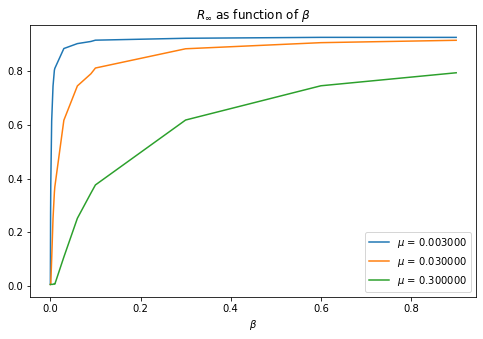

In [16]:
#inizializzo le liste che conterranno le informazioni per poi andare a fare i grafici di confronto
S_inf_list, R_inf_list, S_inf_mu_list, S_inf_beta_list,R_inf_mu_list, R_inf_beta_list = [],[],[],[],[],[]
I_max_list,time_max_list,I_max_mu_list,I_max_beta_list,t_max_mu_list,t_max_beta_list= [],[],[],[],[],[]


for deg in np.unique(last_deg_kept):
    print("###########################################################################################################")
    print("Rimozione dopo il grado: ",deg)
    print("###########################################################################################################")
    print("###########################################################################################################")
    print("###########################################################################################################")
    mu_t_deg=mu_t[last_deg_kept==deg]
    beta_t_deg=beta_t[last_deg_kept==deg]
    time_t_deg=time_t[last_deg_kept==deg]
    S_t_deg=S_t[last_deg_kept==deg]
    I_t_deg=I_t[last_deg_kept==deg]
    R_t_deg=R_t[last_deg_kept==deg]
    

    number_of_nodes=[]
    for i in range(len(S_t_deg)):
        #S_inf += [S_t_deg[i][-1]]
        #R_inf += [R_t_deg[i][-1]]
        number_of_nodes.append(S_t_deg[i][-1]+R_t_deg[i][-1])
    number_of_nodes=number_of_nodes[-1]
    
    #S/R_infinito
    S_inf, R_inf = S_R_inf_surfaces(mu_t_deg ,beta_t_deg ,time_t_deg ,S_t_deg ,I_t_deg ,R_t_deg ,number_of_nodes)
    S_inf_mu, S_inf_beta =tagli(mu_t_deg,beta_t_deg,S_inf,number_of_nodes,[0.003,0.03,0.3],"$S_\\infty$","$S_\\infty$")
    R_inf_mu, R_inf_beta =tagli(mu_t_deg,beta_t_deg,R_inf,number_of_nodes,[0.003,0.03,0.3],"$R_\\infty$","$S_\\infty$")
    #I/t max
    #I_max,time_max=I_max_surfaces(mu_t_deg ,beta_t_deg ,time_t_deg ,S_t_deg ,I_t_deg ,R_t_deg ,number_of_nodes)
    #I_max_mu, I_max_beta =tagli(mu_t_deg,beta_t_deg,I_max,number_of_nodes,[0.03,0.3],"$I_\\max$")
    #time_max_mu, time_max_beta =tagli(mu_t_deg,beta_t_deg,time_max,1,[0.03,0.3],"$t_\\max$")
    
    #appendo le liste perchè verrano cancellate
    
    S_inf_list.append([deg,S_inf])
    R_inf_list.append([deg,R_inf])
    S_inf_mu_list.append([deg,S_inf_mu])
    S_inf_beta_list.append([deg,S_inf_beta])
    R_inf_mu_list.append([deg,R_inf_mu])
    R_inf_beta_list.append([deg,R_inf_beta])
    """I_max_list.append([deg,I_max])
    time_max_list.append([deg,time_max])
    I_max_mu_list.append([deg,I_max_mu])
    I_max_beta_list.append([deg,I_max_beta])
    t_max_mu_list.append([deg,time_max_mu])
    t_max_beta_list.append([deg,time_max_beta])"""
    
    

    

In [17]:
"""Descrizione di come chiamo le liste per fare i plot di confronto"""
S_inf_mu_list[0] #questa contiene tutte le informazioni del grando in [0] che è 10, 1 -> 100, 2-> 200
S_inf_mu_list[0][1] #questo contiene 2 liste che sono rispettivamente le informazioni in funzione di mu per i beta fissati
S_inf_mu_list[0][1][0] #qui selezione che beta volgio considerare
S_inf_mu_list[0][1][0][0] #qui selezione le x o le y del grafico

"""per quelli senza segregazione"""
S_inf_mu[0][0] #il primo zero sta perchè sto gurdando a beta= 0.003 (se mettevo uno gurdavo all' altro valore di beta)
#il secondo zero sta perchè è la x del grafico, ne avessi messo uno sarebbe la y del grafico che infatti metto dopo"""

array([1.e-04, 3.e-04, 6.e-04, 9.e-04, 1.e-03, 3.e-03, 6.e-03, 9.e-03,
       1.e-02, 3.e-02, 6.e-02, 9.e-02, 1.e-01, 3.e-01, 6.e-01, 9.e-01])

confronto S_inf


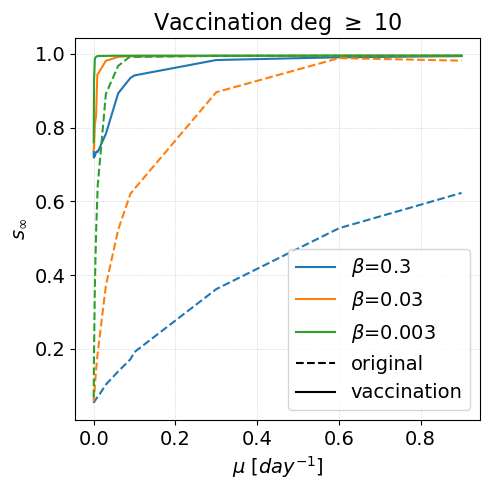

In [27]:
print ("confronto S_inf")

#Grado 10
#beta=0.3

plt.plot(S_inf_mu_norm[2][0],S_inf_mu_norm[2][1],"--",color="C0") 
plt.plot(S_inf_mu_list[0][1][2][0],S_inf_mu_list[0][1][2][1],"-",color="C0")
#beta=0.03
plt.plot(S_inf_mu_norm[1][0],S_inf_mu_norm[1][1],"--",color="C1") 
plt.plot(S_inf_mu_list[0][1][1][0],S_inf_mu_list[0][1][1][1],"-",color="C1")
#beta=0.003
plt.plot(S_inf_mu_norm[0][0],S_inf_mu_norm[0][1],"--",color="C2") 
plt.plot(S_inf_mu_list[0][1][0][0],S_inf_mu_list[0][1][0][1],"-",color="C2")

plt.plot([],[],color="C0",label="$\\beta$=0.3")
plt.plot([],[],color="C1",label="$\\beta$=0.03")
plt.plot([],[],color="C2",label="$\\beta$=0.003")

plt.plot([],[],"--",color="black",label="original")
plt.plot([],[],"-",color="black",label="vaccination")

plt.xlabel("$\\mu$ $[day^{-1}]$")
plt.ylabel("$s_\\infty$")
plt.title("Vaccination deg $\\geq$ 10")
plt.legend()
plt.savefig("./Figure/New_pic/SIR/vax_deg_10.pdf")
plt.show()

confronto S_inf


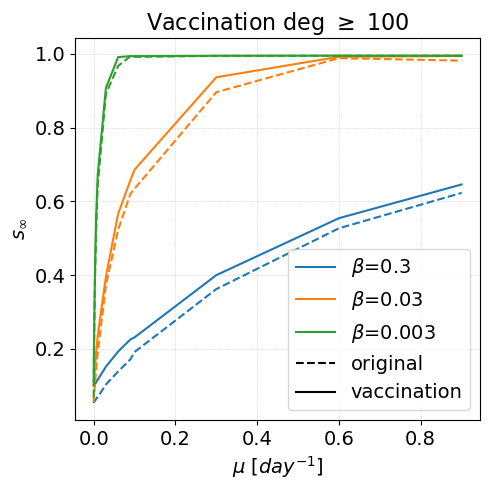

In [30]:
print ("confronto S_inf")

#Grado 100
#beta=0.3

plt.plot(S_inf_mu_norm[2][0],S_inf_mu_norm[2][1],"--",color="C0") 
plt.plot(S_inf_mu_list[1][1][2][0],S_inf_mu_list[1][1][2][1],"-",color="C0")
#beta=0.03
plt.plot(S_inf_mu_norm[1][0],S_inf_mu_norm[1][1],"--",color="C1") 
plt.plot(S_inf_mu_list[1][1][1][0],S_inf_mu_list[1][1][1][1],"-",color="C1")
#beta=0.003
plt.plot(S_inf_mu_norm[0][0],S_inf_mu_norm[0][1],"--",color="C2") 
plt.plot(S_inf_mu_list[1][1][0][0],S_inf_mu_list[1][1][0][1],"-",color="C2")

plt.plot([],[],color="C0",label="$\\beta$=0.3")
plt.plot([],[],color="C1",label="$\\beta$=0.03")
plt.plot([],[],color="C2",label="$\\beta$=0.003")

plt.plot([],[],"--",color="black",label="original")
plt.plot([],[],"-",color="black",label="vaccination")

plt.xlabel("$\\mu$ $[day^{-1}]$")
plt.ylabel("$s_\\infty$")
plt.title("Vaccination deg $\\geq$ 100")
plt.legend()
plt.savefig("./Figure/New_pic/SIR/vax_deg_100.pdf")
plt.show()

confronto S_inf


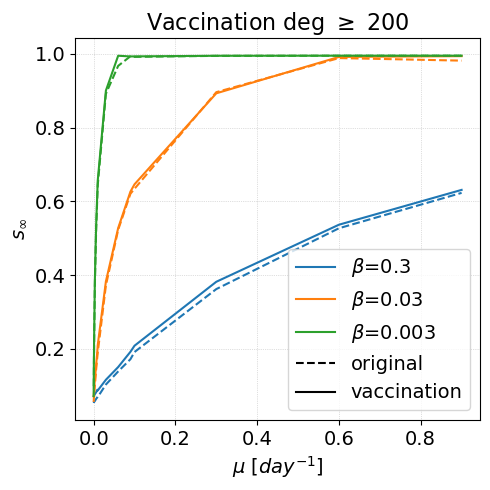

In [32]:
print ("confronto S_inf")

#Grado 200
#beta=0.3

plt.plot(S_inf_mu_norm[2][0],S_inf_mu_norm[2][1],"--",color="C0") 
plt.plot(S_inf_mu_list[2][1][2][0],S_inf_mu_list[2][1][2][1],"-",color="C0")
#beta=0.03
plt.plot(S_inf_mu_norm[1][0],S_inf_mu_norm[1][1],"--",color="C1") 
plt.plot(S_inf_mu_list[2][1][1][0],S_inf_mu_list[2][1][1][1],"-",color="C1")
#beta=0.003
plt.plot(S_inf_mu_norm[0][0],S_inf_mu_norm[0][1],"--",color="C2") 
plt.plot(S_inf_mu_list[2][1][0][0],S_inf_mu_list[2][1][0][1],"-",color="C2")

plt.plot([],[],color="C0",label="$\\beta$=0.3")
plt.plot([],[],color="C1",label="$\\beta$=0.03")
plt.plot([],[],color="C2",label="$\\beta$=0.003")

plt.plot([],[],"--",color="black",label="original")
plt.plot([],[],"-",color="black",label="vaccination")

plt.xlabel("$\\mu$ $[day^{-1}]$")
plt.ylabel("$s_\\infty$")
plt.title("Vaccination deg $\\geq$ 200")
plt.legend()
plt.savefig("./Figure/New_pic/SIR/vax_deg_200.pdf")
plt.show()